In [2]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = sns.load_dataset("flights")
data.head(30)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [3]:
data.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
#Per year
data_per_year = data.groupby('year')['passengers'].sum()
data_per_year = data_per_year.to_frame()

In [6]:
data_per_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1949 to 1960
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


In [7]:
data_per_year.head(15)

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


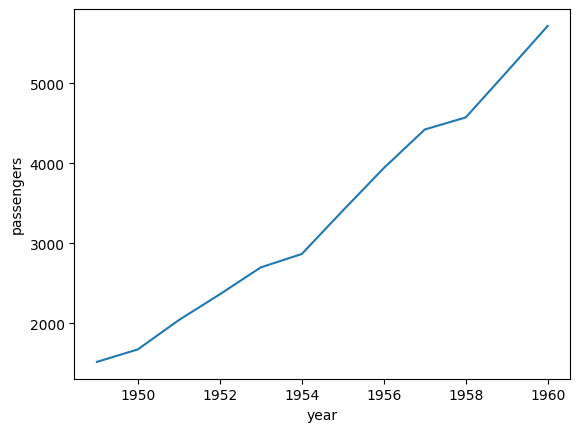

In [8]:
sns.lineplot(data_per_year, x=data_per_year.index, y = data_per_year['passengers']);

In [9]:
#data per month
data_per_month = data.groupby('month')['passengers'].sum()

data_per_month = data_per_month.to_frame()
data_per_month.head(13)

/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_11128/1360412479.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_per_month = data.groupby('month')['passengers'].sum()


,passengers
month,
Jan,2901
Feb,2820
Mar,3242
Apr,3205
May,3262
Jun,3740
Jul,4216
Aug,4213
Sep,3629


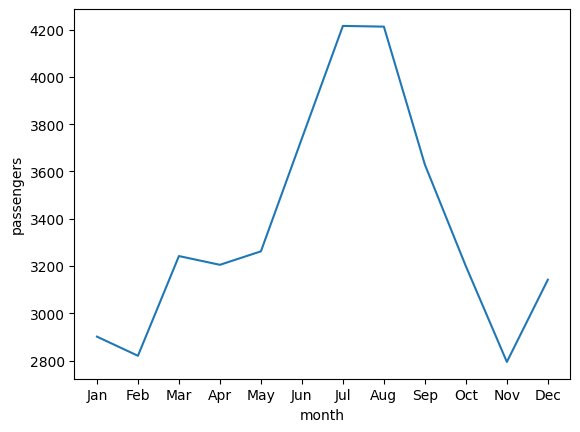

In [10]:
sns.lineplot(data_per_month, x=data_per_month.index, y = data_per_month['passengers']);

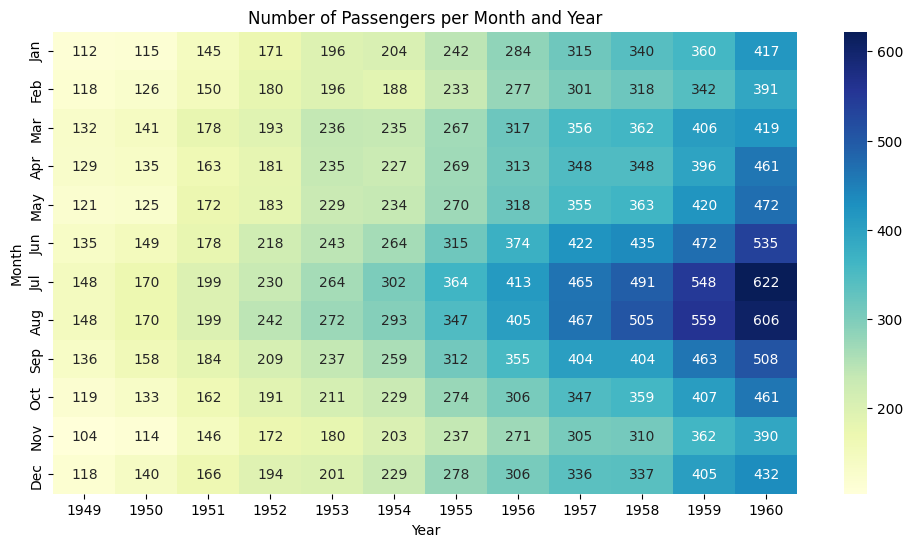

In [12]:
pivot_data = data.pivot(index='month', columns='year', values='passengers')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Passengers per Month and Year")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()